# <center> <font style="color:rgb(100,109,254)"> Advance Thresholding </font>  <center>


In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## <font style="color:rgb(134,19,348)"> Adaptive Mean & Gaussian Thresholding </font>

**The way threshold works is that it will convert all pixels to a certain max value if its above some threshold value but in some cases when there is noise the results of this type of thershold will not be good, so in these cases we have other types of threshold functions like Adaptive thresholding**


> [```dst= cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C)```](https://docs.opencv.org/4.2.0/d7/d1b/group__imgproc__misc.html#ga72b913f352e4a1b1b397736707afcde3)

- `src`	Source 8-bit single-channel image.
- `dst`	Destination image of the same size and the same type as src.
- `maxValue`	Non-zero value assigned to the pixels for which the condition is satisfied
- `adaptiveMethod`Adaptive thresholding algorithm to use, You can use `cv2.ADAPTIVE_THRESH_GAUSSIAN_C` or  `cv2.ADAPTIVE_THRESH_MEAN_C` in place of adaptiveMethod.
- `thresholdType`	Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV.
- `blockSize`	Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.
- `C`	Constant subtracted from the mean or weighted mean. Normally it is positive but may be zero or negative as well.





(-0.5, 601.5, 802.5, -0.5)

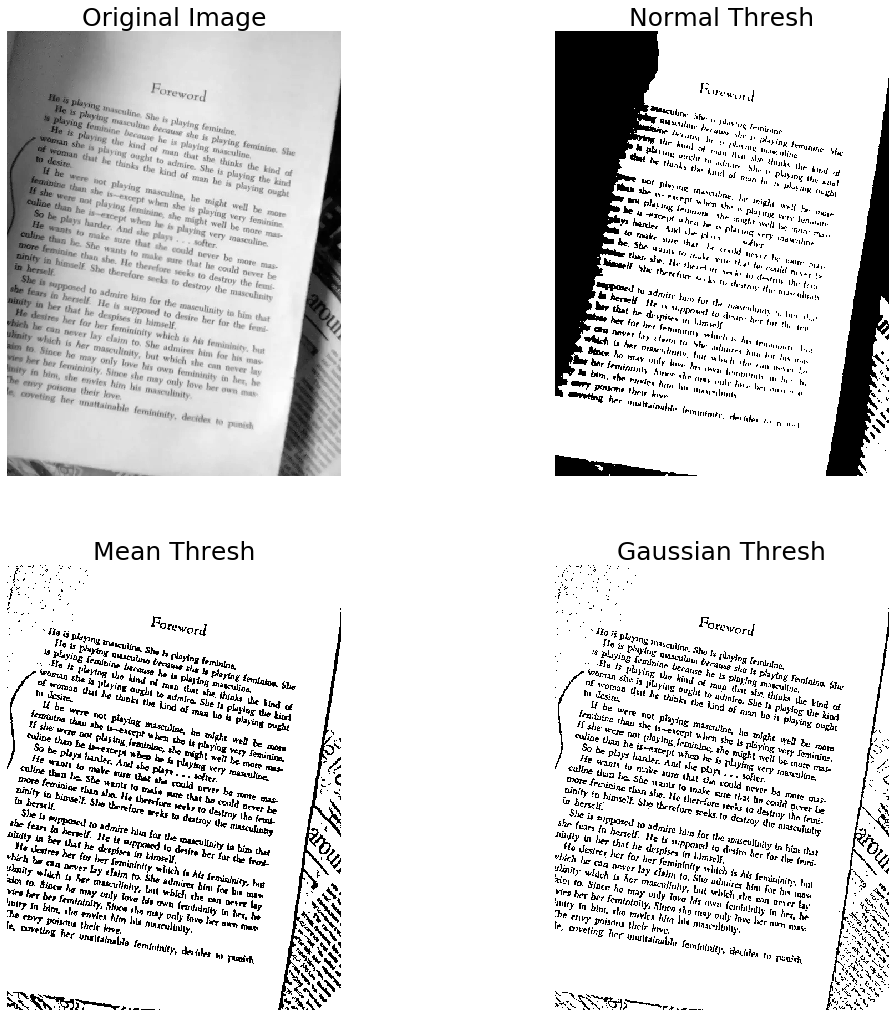

In [8]:
image = cv2.imread('media/M3/book2.png',0)


ret,normal_thresh = cv2.threshold(image,127,255,cv2.THRESH_BINARY)

mean_thresh = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,5)

gaussian_thresh = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,5)


plt.figure(figsize=[18,18])
plt.subplot(221);plt.imshow(image, cmap='gray');plt.title("Original Image",fontdict={'fontsize': 25});plt.axis('off');
plt.subplot(222);plt.imshow(normal_thresh, cmap='gray');plt.title("Normal Thresh",fontdict={'fontsize': 25});plt.axis('off');
plt.subplot(223);plt.imshow(mean_thresh, cmap='gray');plt.title("Mean Thresh",fontdict={'fontsize': 25});plt.axis('off');
plt.subplot(224);plt.imshow(gaussian_thresh,cmap='gray');plt.title("Gaussian Thresh",fontdict={'fontsize': 25});plt.axis('off')

**Note: In the above, the threshold value is calculated automatically.**

If you use `cv2.ADAPTIVE_THRESH_GAUSSIAN_C` then the threshold value T(x,y) is a mean of the blockSize×blockSize neighborhood of (x,y) minus C.

If you use `cv2.ADAPTIVE_THRESH_GAUSSIAN_C` the threshold value T(x,y) is a weighted sum (cross-correlation with a Gaussian window) of the blockSize×blockSize neighborhood of (x,y) minus C . The default sigma (standard deviation) is used for the specified blockSize.

##  <font style="color:rgb(134,19,348)"> Otsu Thresholding </font>
To use Otsu Thresholding you have to use regular thresholding but just pass in this extra flag `cv2.CV_THRESH_OTSU` 

Otsu thresholding is use where the image is bimodal (It has two peaks) and so a thresh value in middle of those peaks are to be calculated

**Note:** When using Otsu , your threshold value will be ignored and will be calculated by the Otsu alogrithim 

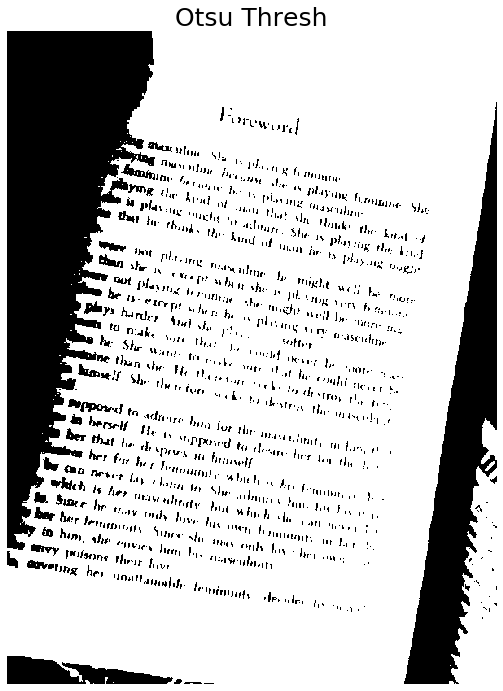

In [9]:
ret,otsu = cv2.threshold(image,0,15,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(figsize=[12,12])
plt.imshow(otsu, cmap='gray');plt.title("Otsu Thresh",fontdict={'fontsize': 25});plt.axis('off');

Granted Otsu doesn't gives the best of results for our example image but its still a really useful method and is used widely